In [1]:
import os
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
from PIL import Image as im
from PIL import Image
import shutil

In [79]:
def getCrossFileCombination(ImageAFileList, AFolderName, AllFoldersWithPath, CrossFileName,notebook_path):
    f=open(cross_pair_str_name,'w')
    
    for folder in AllFoldersWithPath:
        if folder!= AFolderName:
            for file in os.scandir(folder):
                
                imgB_relative_path=file.path.removeprefix(notebook_path+"/")
                
                for imgA_relative_path in ImageAFileList:
                    f.write(imgA_relative_path+" "+imgB_relative_path+"\n")
    f.close()

In [80]:

notebook_path=os.path.dirname(os.path.realpath("demo.ipynb"))
print(notebook_path)
os.makedirs("ButterFlyPairs",exist_ok=True)

butterfile_train_path=notebook_path+"/ButterFly/train/"
butterfile_test_path=notebook_path+"/ButterFly/test/"
butterfly_pair_path=notebook_path+"/ButterFlyPairs/"

butterfly_train_folders=[]
for file in os.scandir(butterfile_train_path):
    if file.is_dir():
        butterfly_train_folders.append(file.path)
        
#input_directory = match.py directory
#Directory pairs(resides in match.py directory) has all self and cross files


for folder in butterfly_train_folders:
    
    self_pair_str_name=butterfly_pair_path+folder.removeprefix(butterfile_train_path)+"_Self.txt"
    cross_pair_str_name=butterfly_pair_path+folder.removeprefix(butterfile_train_path)+"_Cross.txt"
    f=open(self_pair_str_name, 'w')
    
    file_list=[]
    for file in os.scandir(folder):
        if file.is_file():
            img_relative_path=file.path.removeprefix(notebook_path+"/")
            
            f.write(img_relative_path + " "+img_relative_path+"\n")
            file_list.append(img_relative_path)
            
    self_combo_list=list(combinations(file_list, 2))
    for i in range(len(self_combo_list)):
        f.write(self_combo_list[i][0]+ " "+self_combo_list[i][1]+"\n")
    f.close()
    
    getCrossFileCombination(file_list,folder,butterfly_train_folders,cross_pair_str_name,notebook_path)
            
                    

/home/disaster/Desktop/github/SuperGluePretrainedNetwork


In [92]:
#take a single image from each folder

notebook_path=os.path.dirname(os.path.realpath("demo.ipynb"))
print(notebook_path)
os.makedirs("ButterFlyPairs",exist_ok=True)

butterfile_train_path=notebook_path+"/ButterFly/train/"
butterfile_test_path=notebook_path+"/ButterFly/test/"
butterfly_pair_path=notebook_path+"/ButterFlyPairs_SingleEach/"

butterfly_train_folders=[]
for file in os.scandir(butterfile_train_path):
    if file.is_dir():
        butterfly_train_folders.append(file.path)
        


for folder in butterfly_train_folders:
    
    self_pair_str_name=butterfly_pair_path+folder.removeprefix(butterfile_train_path)+"_Self.txt"
    cross_pair_str_name=butterfly_pair_path+folder.removeprefix(butterfile_train_path)+"_Cross.txt"
    
    
    #self_files
    f=open(self_pair_str_name, 'w')
    for file in os.scandir(folder):
        
        img1_relative_path=file.path.removeprefix(notebook_path+"/")
    
        for file2 in os.scandir(folder):
            img2_relative_path=file2.path.removeprefix(notebook_path+"/")
            f.write(img1_relative_path + " "+img2_relative_path+"\n")
        break
        
    f.close()
        
            
    #cross files
    f=open(cross_pair_str_name,'w')
    
    for folder2 in butterfly_train_folders:
        if folder!= folder2:
            for file in os.scandir(folder2):
                imgB_relative_path=file.path.removeprefix(notebook_path+"/")
                f.write(img1_relative_path+" "+imgB_relative_path+"\n")
    f.close()


/home/disaster/Desktop/github/SuperGluePretrainedNetwork


In [173]:
#knn for every type one or all and saving
notebook_path=os.path.dirname(os.path.realpath("demo.ipynb"))
knn_path=notebook_path+"/knn_results/"

for file in os.scandir(knn_path):
    if file.is_dir()== True:
        continue
    npz=np.load(file)
    self_match_number=npz['self_matches']
    cross_match_number=npz['cross_matches']
    plt.hist(cross_match_number, bins="auto", alpha=0.5, label='cross')
    plt.hist(self_match_number, bins="auto", alpha=0.5, label='self')
    plt.legend(loc='upper right')
    plt.xlabel("Number of keypoint matches")
    plt.ylabel("Avg Number of matches in that range")
    plt.title("For "+file.name)
    file_name=file.name
    plt.savefig(knn_path+"/match_histogram_images/"+file_name.removesuffix(".npz")+".png")
    plt.close()
    plt.scatter(self_match_number,[0]*self_match_number.shape[0],label="self")
    plt.scatter(cross_match_number,[1]*cross_match_number.shape[0],marker="x",label="cross")
    plt.savefig(knn_path+"/knn_of_matches_images/"+file_name.removesuffix(".npz")+".png")
    plt.close()

(1600, 1600)


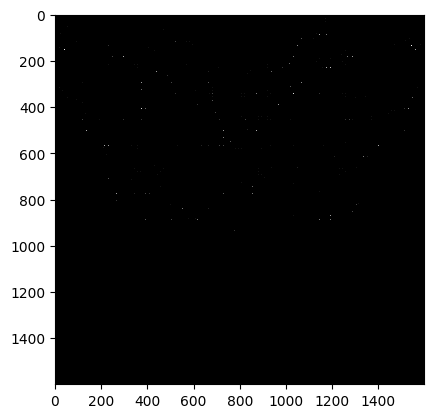

In [102]:
#read result npz file
notebook_path=os.path.dirname(os.path.realpath("demo.ipynb"))
results=notebook_path+"/heatmap_results/"
for file in os.scandir(results):
    npz=np.load(file)
    print(npz["heat_map"].shape)
    heatmap=npz["heat_map"]
    heatmap=np.divide(heatmap,np.sum(heatmap))
    plt.imshow(heatmap, interpolation='nearest',cmap="gray")
    plt.show()

In [156]:
    #different heatmap image generator
    root_path=os.path.abspath(os.getcwd())
    result_path=root_path+"/heatmap_results/"
    butterfile_train_path=root_path+"/ButterFly/train/"

    butterfly_train_folders=[]
    for file in os.scandir(butterfile_train_path):
        if file.is_dir():
            butterfly_train_folders.append(file.name)
        


    for folder in butterfly_train_folders:
        #print(folder)
        if os.path.exists(result_path+"/"+folder+"_Self.npz") and os.path.exists(result_path+"/"+folder+"_Cross.npz"):
            self_heat_map=np.load(result_path+"/"+folder+"_Self.npz")
            cross_heat_map=np.load(result_path+"/"+folder+"_Cross.npz")
            sheatmap=self_heat_map["heat_map"]
            sheatmap=np.divide(sheatmap,np.sum(sheatmap))
            
            #plt.imshow(sheatmap, interpolation='nearest',cmap="gray")
            #plt.show()

            cheatmap=cross_heat_map["heat_map"]
            cheatmap=np.divide(cheatmap,np.sum(cheatmap))

            #difference_heatmap=np.subtract(sheatmap,cheatmap)
            difference_heatmap=sheatmap
            difference_heatmap[cheatmap>0]=0
            difference_heatmap[difference_heatmap<0]=0
            print(np.max(difference_heatmap))


             #resize the image and plot the difference heatmap
            width=1600
            
            pairs_path=os.path.abspath(os.getcwd())+"/ButterFlyPairs_SingleEach/"
            with open(pairs_path+folder+'_Self.txt') as f:
                first_line = f.readline()
                img=Image.open(root_path+"/"+first_line.split()[0])
                wpercent = (width/float(img.size[0]))
                hsize = int((float(img.size[1])*float(wpercent)))
                img = img.resize((width,hsize), resample=Image.LANCZOS)
                f.close()
                
            f, axarr = plt.subplots(2,1)
            print(axarr.shape)
            axarr[1].imshow(img)
            
            for i in range(1600):
                for j in range(1600):
                    if difference_heatmap[i][j]>0:
                        axarr[0].plot(j, i, marker='.', color="white")
            axarr[0].imshow(img)
            plt.savefig(result_path+"Difference_Img_without_Norm/"+folder+".png")
            plt.close()
        break
        
        

0.0001924001924001924
(2,)


In [124]:
 #create self match and cross match keypoints number for each type   
    
    root_path=os.path.abspath(os.getcwd())
    result_path=root_path+"/knn_results/"

    if not os.path.exists(result_path):
        os.makedirs(result_path)
        
    butterfile_train_path=root_path+"/ButterFly/train/"

    butterfly_train_folders=[]
    for file in os.scandir(butterfile_train_path):
        if file.is_dir():
            butterfly_train_folders.append(file.name)
        


    for folder in butterfly_train_folders:
        
        self_match_number=[]
        cross_match_number=[]
        
        self_folder_npz_path=root_path+"/"+folder+"_Self/"
        cross_folder_npz_path=root_path+"/"+folder+"_Cross/"
        
        if os.path.exists(self_folder_npz_path) and os.path.exists(cross_folder_npz_path):
            for file in os.scandir(self_folder_npz_path):
                npz=np.load(self_folder_npz_path+file.name)
                self_match_number.append(np.sum(npz['matches']>-1))
        
            print(self_match_number)

            for file in os.scandir(cross_folder_npz_path):
                npz=np.load(cross_folder_npz_path+file.name)
                cross_match_number.append(np.sum(npz['matches']>-1))
        
            print(cross_match_number)
            
            np.savez(result_path+folder, self_matches=self_match_number,cross_matches=cross_match_number)
            
    mpz=np.load(result_path+"erato_emma.npz")
    print(mpz['cross_matches'].shape)

[2048]
[59, 95, 139, 124, 267, 179, 148, 66, 86, 37, 113, 99, 129, 110, 43, 267, 192]
(17,)


erato_petiverana
34
263


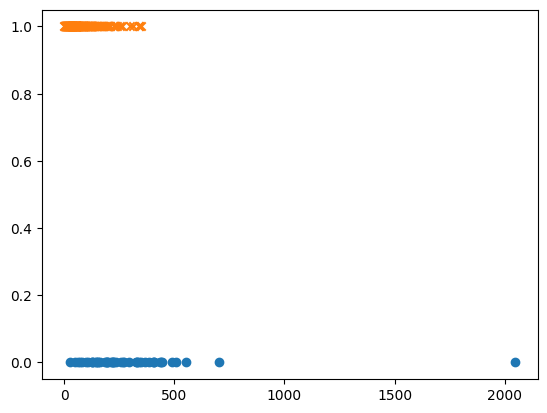

melpomene_ecuadorensis


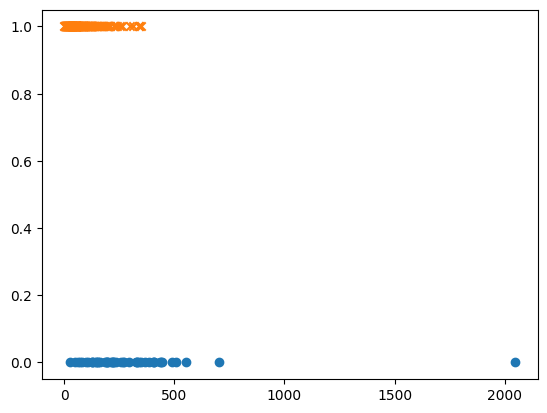

melpomene_vulcanus


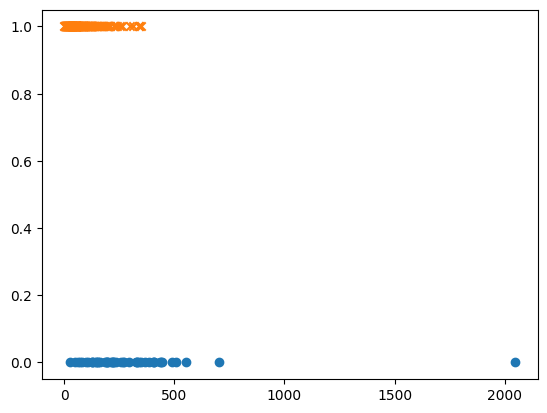

melpomene_amaryllis


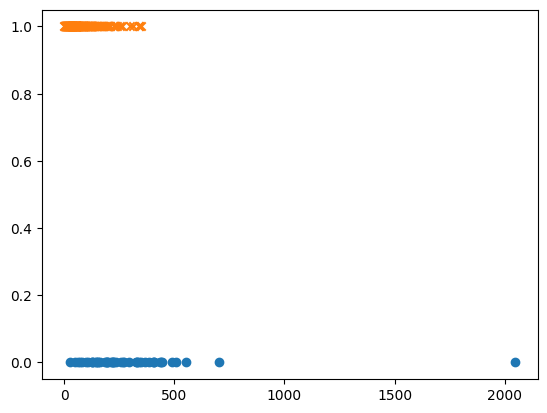

erato_emma
1
296


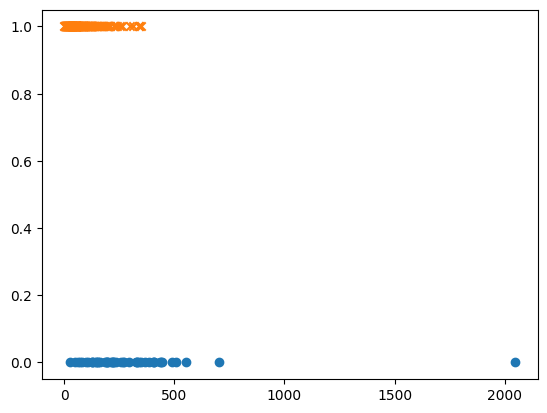

erato_microclea
8
289


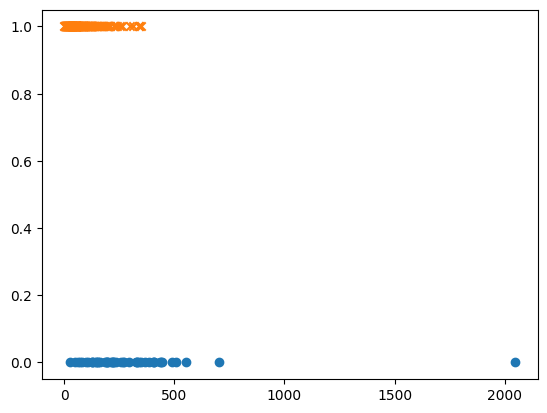

erato_favorinus
3
294


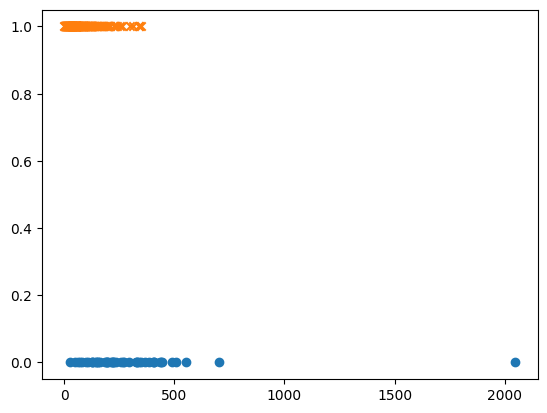

melpomene_melpomene


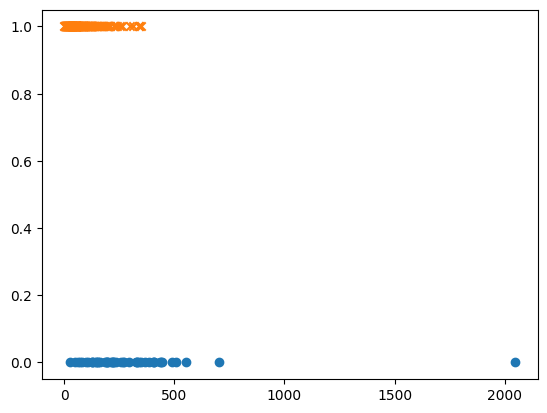

erato_phyllis
48
249


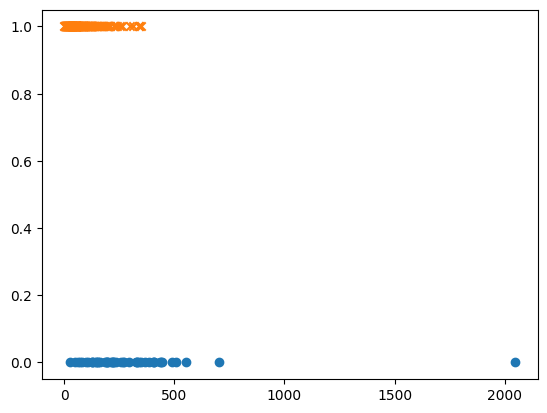

melpomene_cythera


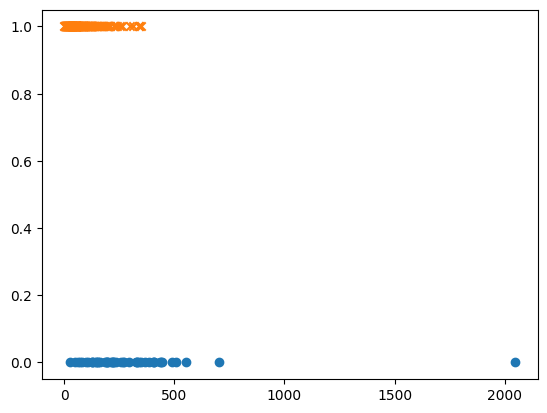

melpomene_xenoclea


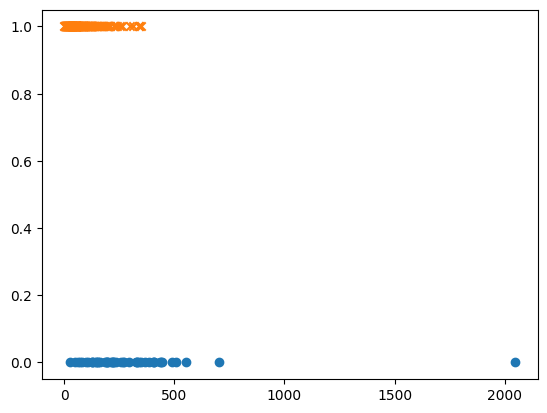

erato_lativitta
18
279


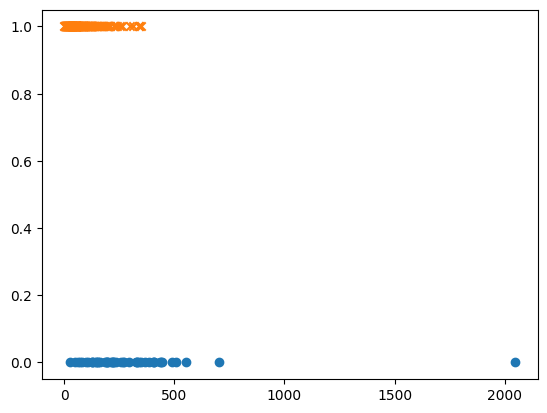

erato_venus
8
289


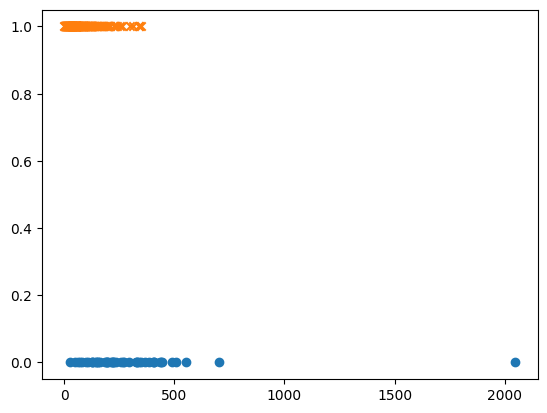

erato_hydara
40
257


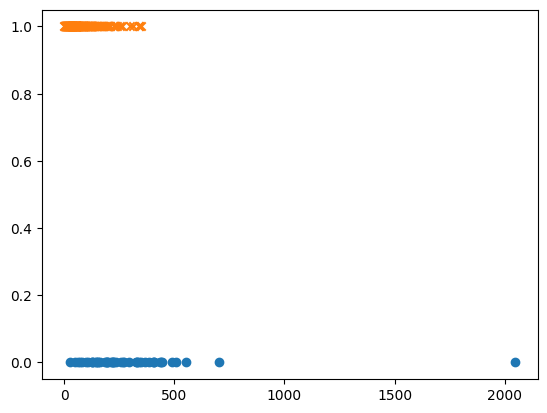

melpomene_nanna


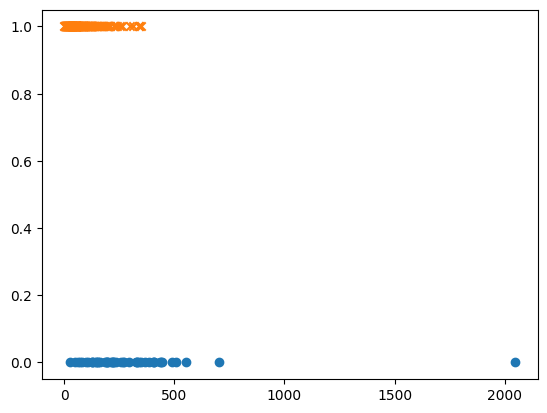

erato_colombina
1
296


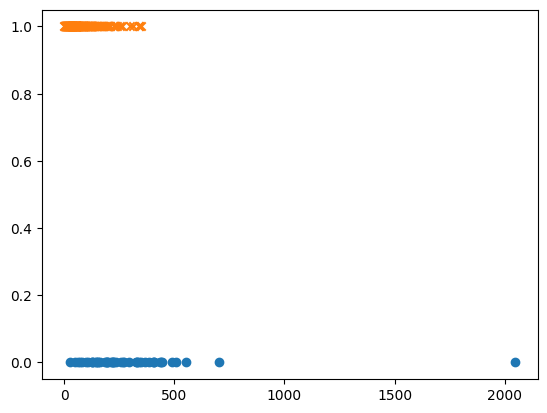

erato_etylus
5
292


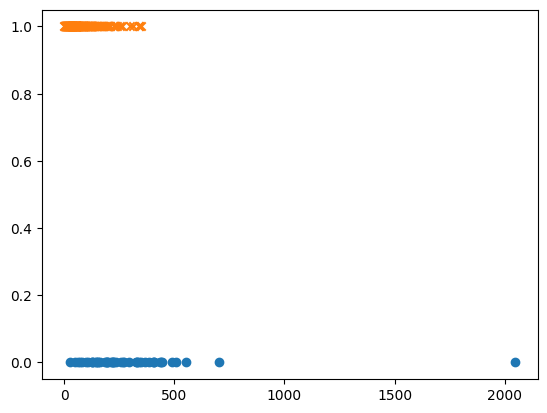

melpomene_schunkei


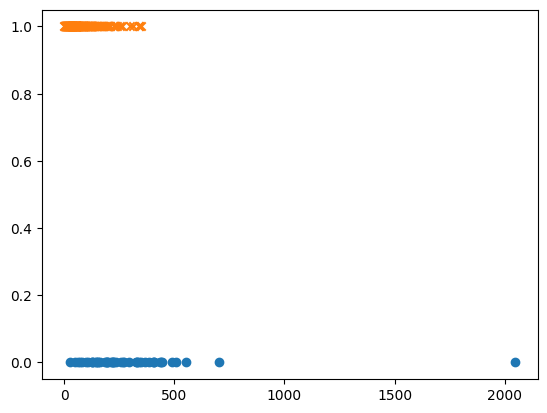

erato_guarica
1
296


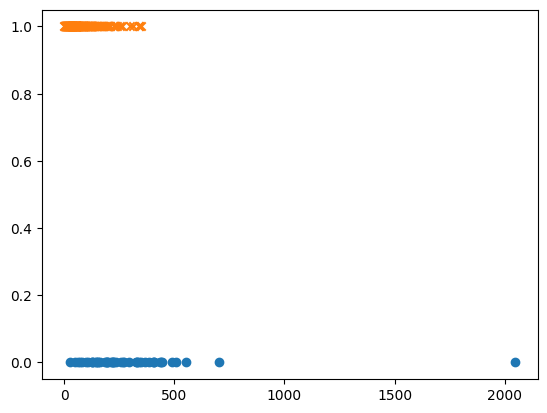

melpomene_plesseni


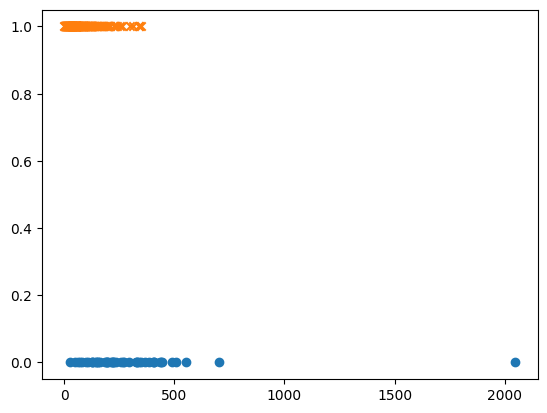

melpomene_rosina_S


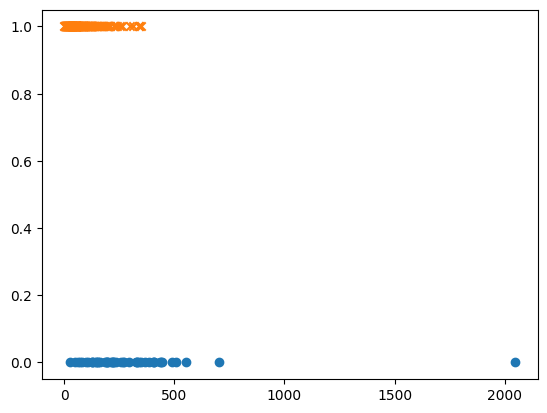

erato_cyrbia
17
280


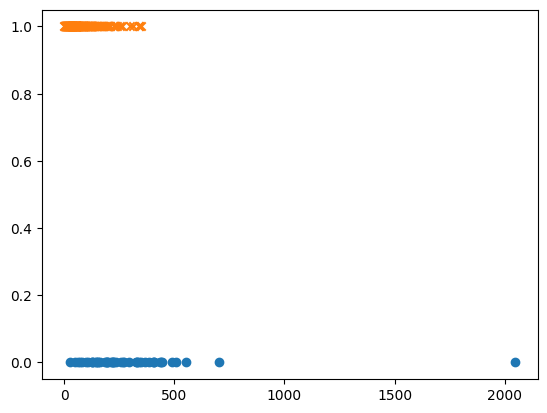

erato_erato
2
295


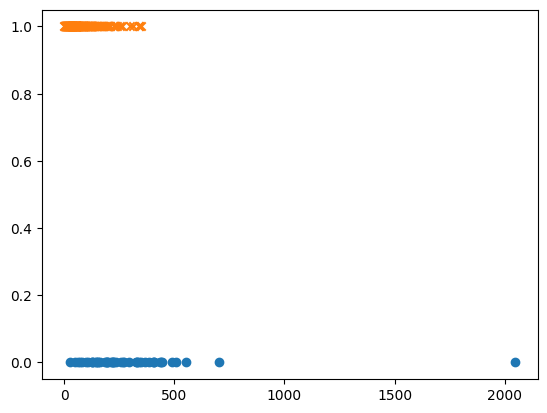

erato_luscombei
2
295


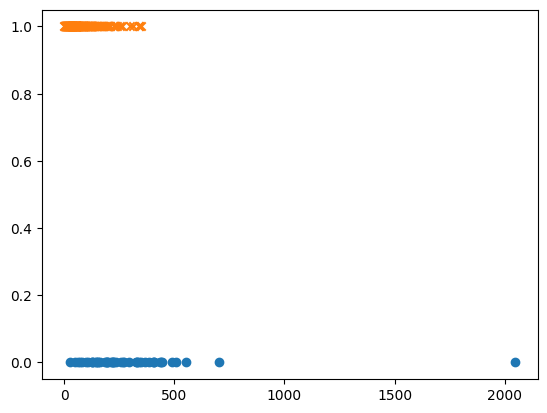

melpomene_rosina_N


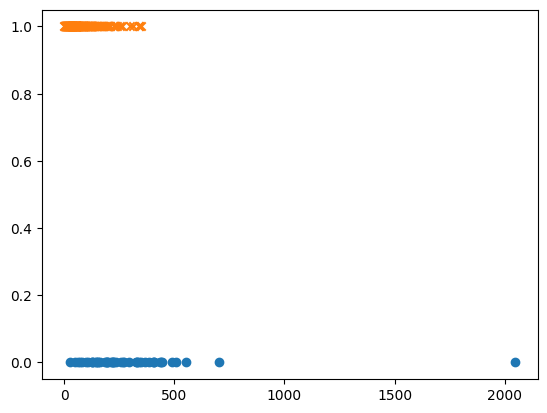

melpomene_aglaope


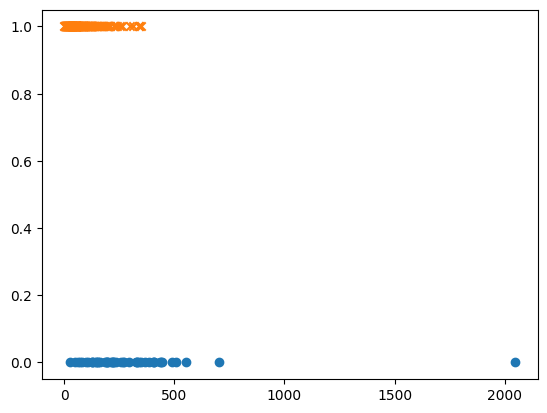

erato_notabilis
5
292


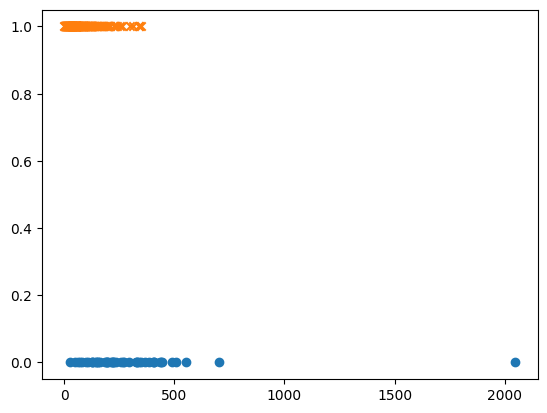

In [199]:
#create self match and cross match keypoints number for each type   
    
root_path=os.path.abspath(os.getcwd())
result_path=root_path+"/knn_results/"

if not os.path.exists(result_path):
    os.makedirs(result_path)

butterfile_train_path=root_path+"/ButterFly/train/"

butterfly_train_folders=[]

for file in os.scandir(butterfile_train_path):
    if file.is_dir():
        butterfly_train_folders.append(file.name)
        


for folder in butterfly_train_folders:
    print(folder)
        
    self_match_number=[]
    cross_match_number=[]
        
    self_folder_npz_path=root_path+"/"+folder+"_Self/"
    cross_folder_npz_path=root_path+"/"+folder+"_Cross/"
        
    if os.path.exists(self_folder_npz_path) and os.path.exists(cross_folder_npz_path):
        for file in os.scandir(self_folder_npz_path):
            npz=np.load(self_folder_npz_path+file.name)
            #print(sum(npz['match_confidence']>1))
            self_match_number.append(sum(npz['match_confidence']>.5))
        
        print(len(self_match_number))

        for file in os.scandir(cross_folder_npz_path):
            npz=np.load(cross_folder_npz_path+file.name)
            cross_match_number.append(sum(npz['match_confidence']>.5))
        
        print(len(cross_match_number))
            
        np.savez(result_path+folder, self_matches=self_match_number,cross_matches=cross_match_number)
            
    #break
    npz=np.load(result_path+"erato_phyllis.npz")
    self_match_number=npz['self_matches']
    cross_match_number=npz['cross_matches']
    plt.scatter(self_match_number,[0]*self_match_number.shape[0],label="self")
    plt.scatter(cross_match_number,[1]*cross_match_number.shape[0],marker="x",label="cross")
    plt.savefig(knn_path+"knn_confidence_images/"+file_name.removesuffix(".npz")+".png")
    plt.show()
    plt.close()
    #print(mpz['cross_matches'].shape)

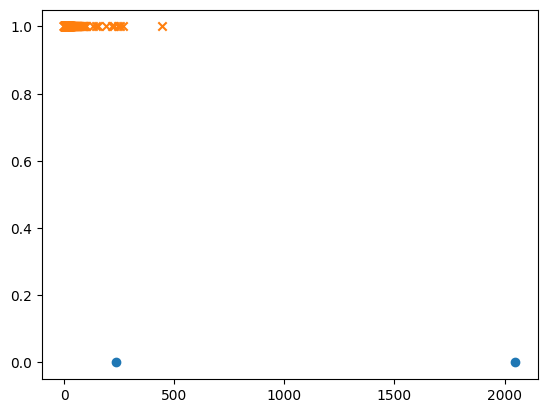

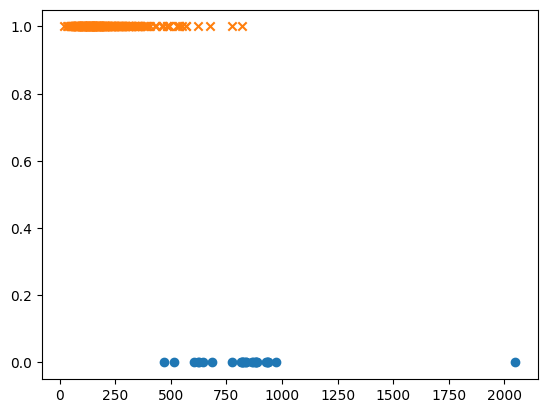

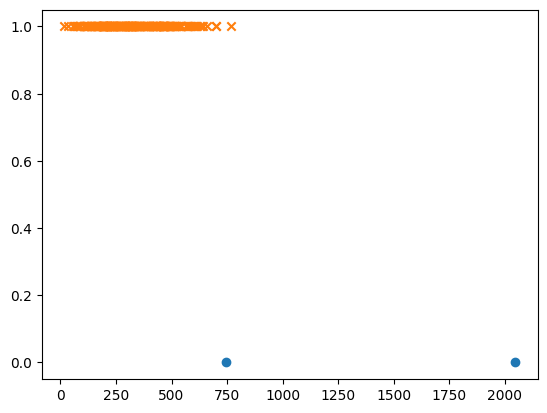

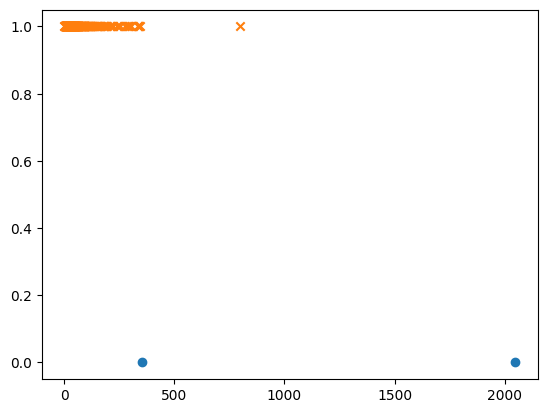

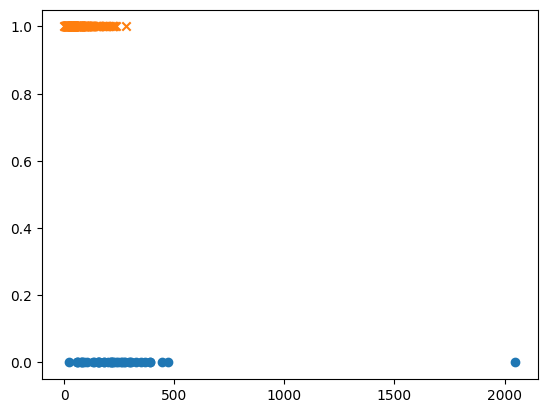

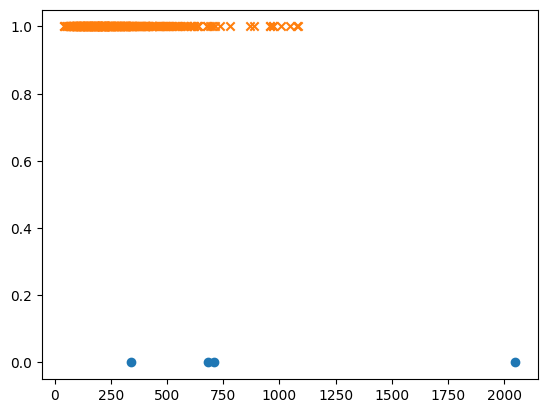

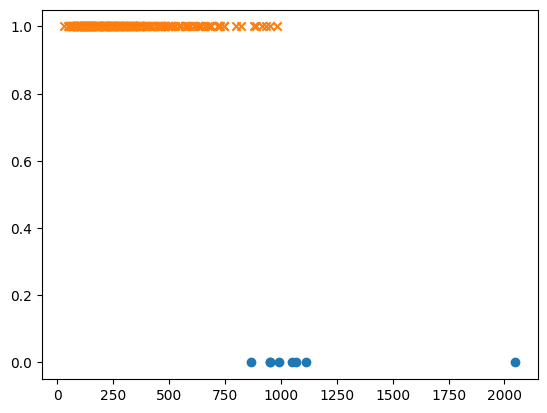

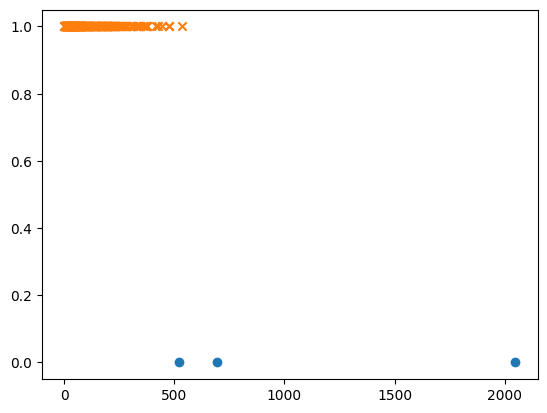

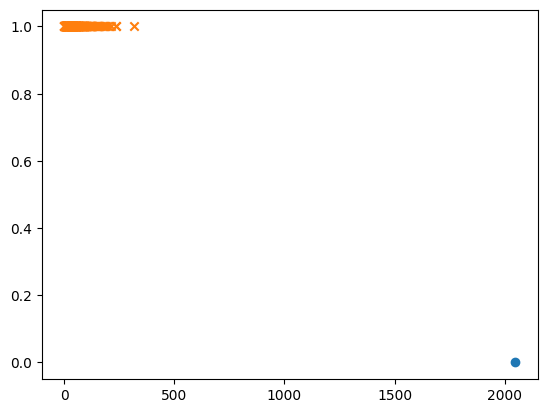

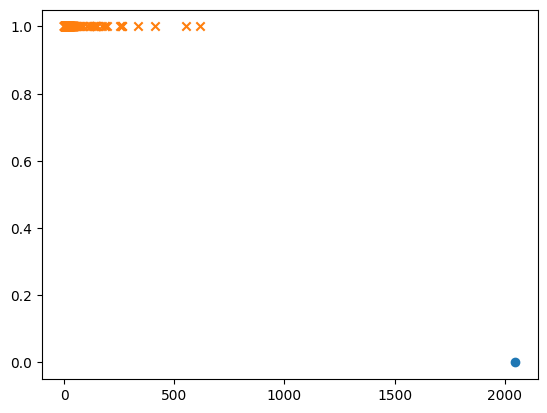

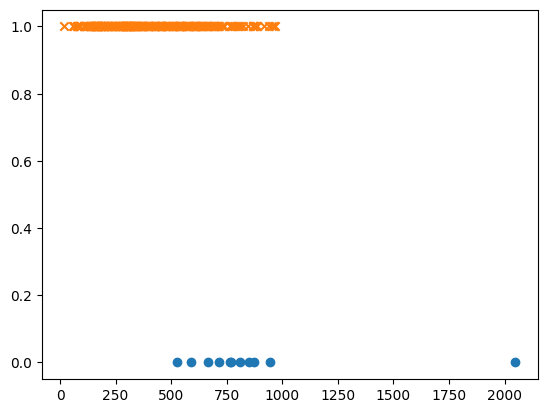

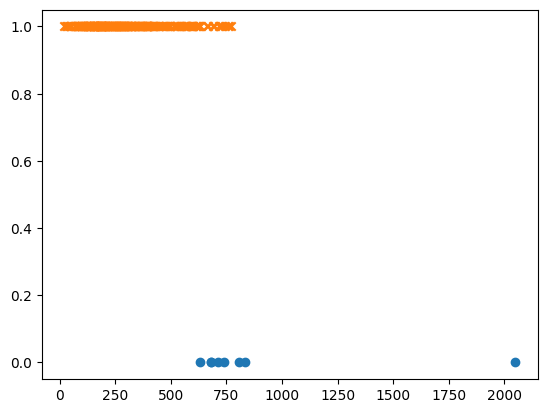

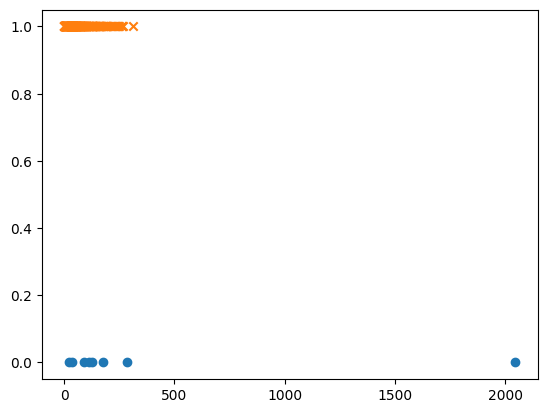

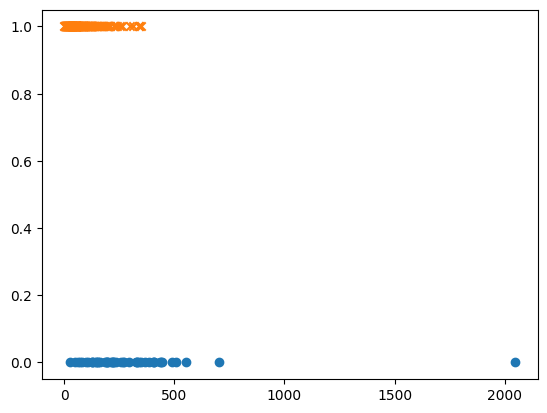

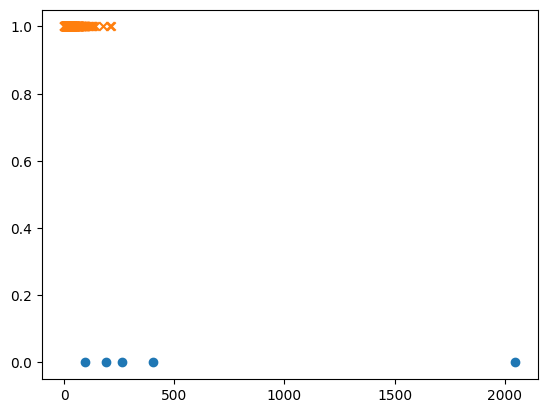

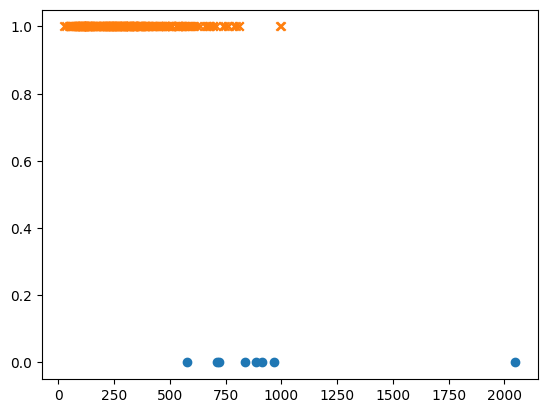

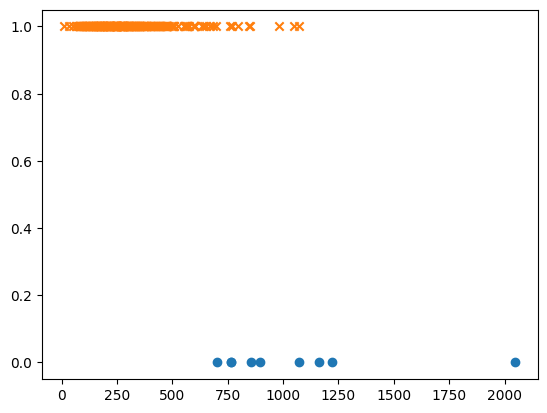

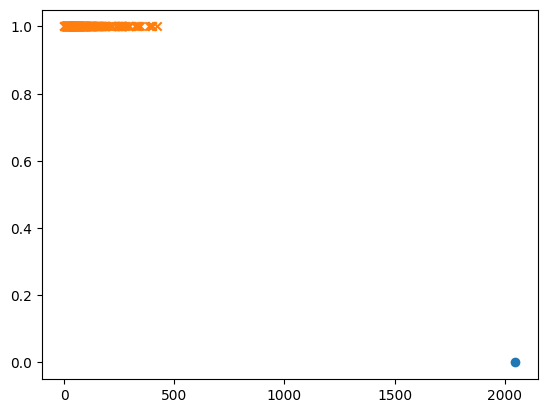

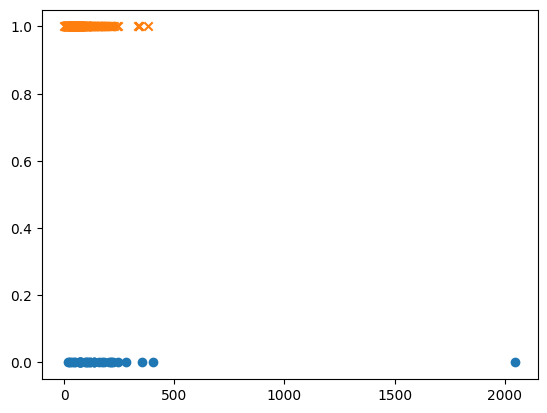

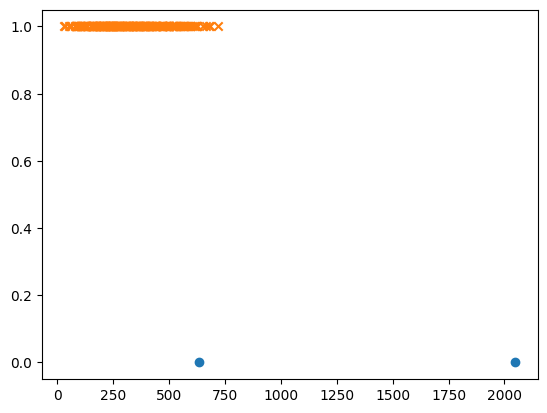

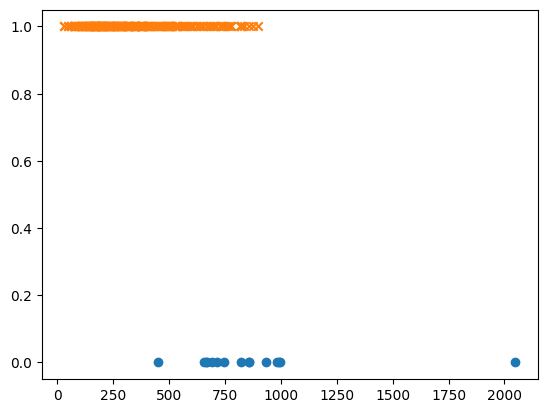

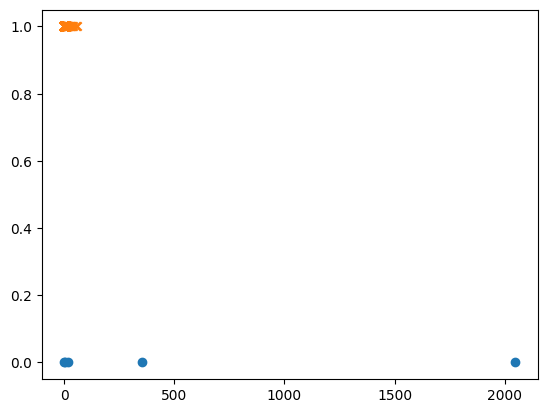

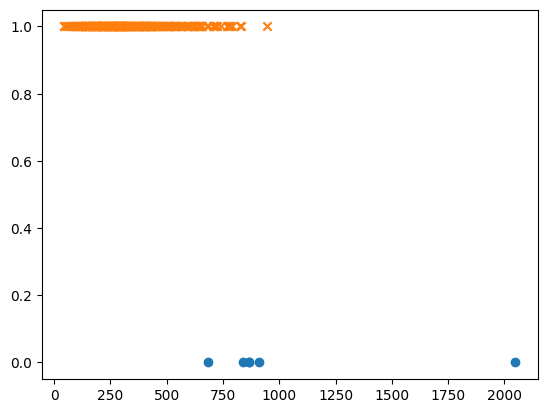

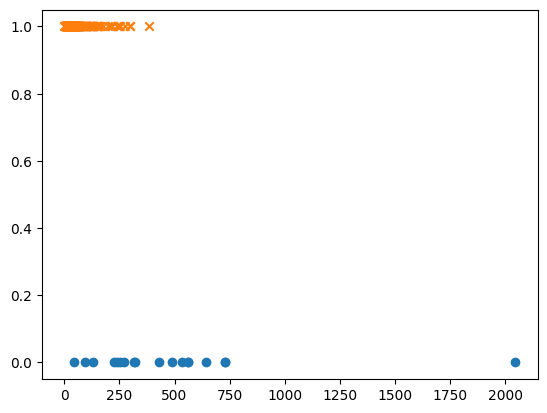

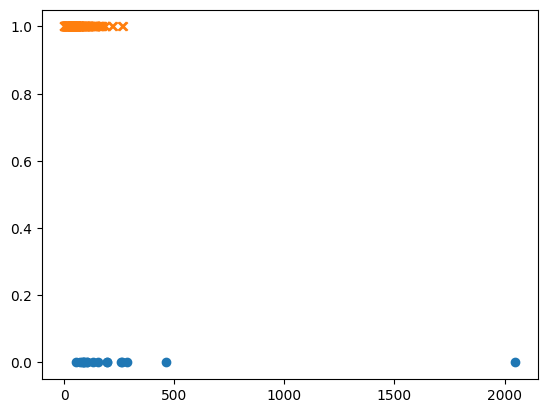

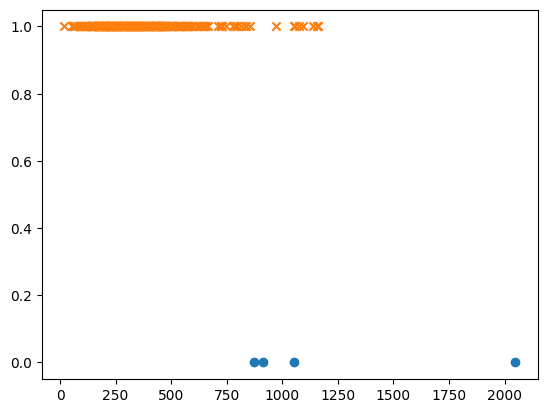

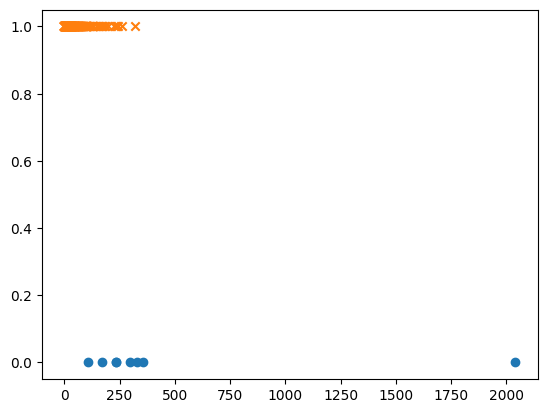

In [188]:

#knn for every type one or all and saving
notebook_path=os.path.dirname(os.path.realpath("demo.ipynb"))
knn_path=notebook_path+"/knn_results/"

for file in os.scandir(knn_path):
    if file.is_dir()== True:
        continue
    npz=np.load(file)
    self_match_number=npz['self_matches']
    cross_match_number=npz['cross_matches']
    plt.scatter(self_match_number,[0]*self_match_number.shape[0],label="self")
    plt.scatter(cross_match_number,[1]*cross_match_number.shape[0],marker="x",label="cross")
    plt.savefig(knn_path+"knn_confidence_images/"+file_name.removesuffix(".npz")+".png")
    plt.show()
    plt.close()